# Explorando Dados da Indústria de Games

## Introdução

Este projeto visa analisar os dados da venda de jogos da loja on line "Ice" no período de 1980 a 2016 procurando identificar padrões que levam um jogo ao sucesso ou não a fim de colaborar nas projeções para campanhas publicitárias para o ano subsequente.


# Sumário
2. **[Apreciação dos Dados:](#apreciacao-dos-dados)**

2. **[Preparação dos Dados:](#preparacao-dos-dados)**
   - Correções/conversões;
   - Descrições preliminares;
   - Criações de novas colunas para utilização posterior.

3. **[Análise Exploratória dos Dados:](#analise-exploratoria-dos-dados)**
   - Lançamento de jogos por ano;
   - Total de vendas por plataforma;
   - Tempo de vendas de cada plataforma;
   - Popularidade de plataformas em diferentes períodos;
   - Lucratividade das plataformas;
   - Correlação entre as avaliações de usuários e profissionais e as vendas de uma plataforma popular.

4. **[Interação Criativa com os Dados:](#interacao-criativa-com-os-dados)**
   - Criação de perfis de usuários por região:
      - Top 5 Plataformas por Região;
      - Top 5 Gêneros por Região;
      - Relação ESRB x Vendas.

5. **[Testes Estatísticos de Hipótese:](#testes-estatisticos-de-hipotese)**
   - As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas;
   - As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes;
   - Critérios utilizados.

6. **[Conclusão:](#conclusao)**


<a id='apreciacao-dos-dados'></a>
## 2 - Apreciação dos Dados:

In [8]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
# Lendos os dados
df_data = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

In [10]:
# Imprimindo amostra dos dados
df_data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3182,Sim Theme Park,PS,1999.0,Strategy,0.35,0.24,0.00,0.04,NaN,NaN,NaN
4010,Dynasty Warriors: Gundam 2,PS3,2008.0,Action,0.09,0.06,0.32,0.03,54.0,7,T
3028,Pro Pinball: Big Race USA,PS,1999.0,Simulation,0.37,0.25,0.00,0.04,69.0,tbd,E
12933,Neverland Card Battles,PSP,2008.0,Role-Playing,0.04,0.00,0.00,0.01,57.0,7.8,T
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,NaN


In [11]:
# Imprimindo informações gerais do df
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id='preparacao-dos-dados'></a>
## 3 - Preparação dos Dados:

In [12]:
# Convertendo nomes das colunas para minúsculas
df_data.columns = df_data.columns.str.lower()

# Convertendo dados das colunas 'name', 'platform' e 'genre' para minúsculas
df_data['name'] = df_data['name'].str.lower()
df_data['platform'] = df_data['platform'].str.lower()
df_data['genre'] = df_data['genre'].str.lower()

# Excluindo as linhas com valores nulos na coluna 'year_of_release'
df_data.dropna(subset=['year_of_release'], inplace=True)
df_data['year_of_release'].isnull().sum()

0

In [13]:
# Convertendo a coluna 'year_of_release' para números inteiros e lidando com valores nulos
df_data['year_of_release'] = df_data['year_of_release'].astype(int)

In [14]:
# Convertendo a coluna 'user_score' para float64
df_data['user_score'] = pd.to_numeric(df_data['user_score'], errors='coerce')

df_data.info()

df_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [15]:
# Analisando valores únicos na coluna 'Rating'
df_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
# Contando os valores ausentes
df_data.isnull().sum()


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [18]:
# Verificação de valores ausentes nas colunas 'name' e 'genre'
linhas_sem_dados = df_data[['name', 'genre']].isnull().any(axis=1)

print(df_data[linhas_sem_dados])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen             1993   NaN      1.78      0.53      0.00   
14244  NaN      gen             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [19]:
# Eliminando as linhas com valores nulos nas colunas 'name' e 'genre'
df_data = df_data.dropna(subset=['name', 'genre'])

# Verificando se as linhas foram eliminadas
print(df_data.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


In [20]:
count_rating_by_year = df_data.groupby('year_of_release')['rating'].nunique().reset_index(name='count')

print(count_rating_by_year.head(5))
print()
print(count_rating_by_year.tail(5))

   year_of_release  count
0             1980      0
1             1981      0
2             1982      0
3             1983      0
4             1984      0

    year_of_release  count
32             2012      4
33             2013      4
34             2014      4
35             2015      4
36             2016      4


In [21]:
# Cálculo das vendas totais
df_data['total_sales'] = df_data['na_sales'] + df_data['eu_sales'] + df_data['jp_sales'] + df_data['other_sales']

df_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<a id='analise-exploratoria-dos-dados'></a>
## 4 - Análise Exploratória dos Dados:

### 4.1 Lançamento de jogos por ano

In [22]:
# Agrupamento de dados
games_per_year = df_data.groupby('year_of_release')['name'].nunique().reset_index(name='count')

# Filtro dos dados relevantes
games_per_year_filtered = games_per_year.iloc[1:]

# Gráfico
fig = px.bar(games_per_year_filtered, x='year_of_release', y='count', title='Jogos Lançados por Ano', labels={'year_of_release': 'Ano de Lançamento', 'count':'Contagem'})
fig.update_xaxes(tickmode='linear', tickangle=45)

fig.show()

<div style="color: #307aff;"> 

Observações:

Houve um crescimento significativo a partir de 1993 com o maior numero de lançamentos de games no ano de 2008 seguido por uma queda nos anos subsequentes.</div>

### 4.2 Total de vendas por plataforma

In [23]:
# Agrupamento dos dados por plataforma e vendas totais
platform_total_sales = df_data.groupby('platform')['total_sales'].sum().reset_index()

# Ordenação das plataformas por vendas totais em ordem decrescente
platform_sales_sorted = platform_total_sales.sort_values(by='total_sales', ascending=False)

platform_sales_sorted.head()

,platform,total_sales
16,ps2,1233.56
28,x360,961.24
17,ps3,931.34
25,wii,891.18
4,ds,802.78


In [24]:
fig = px.bar(platform_sales_sorted.head(10), 
             x='platform', 
             y='total_sales', 
             title='Top 10 Total de Vendas (Por plataforma)', 
             color='platform', 
             labels={'platform': 'Plataformas', 'total_sales':'Total de Vendas'})
fig.update_xaxes(tickmode='linear')

In [25]:
# Seleção das principais plataformas com as maiores vendas totais
top_platforms = platform_sales_sorted.head(10)['platform'].tolist()

# Filtragem do DataFrame original para incluir apenas as principais plataformas
top_platforms_data = df_data[df_data['platform'].isin(top_platforms)]

# Filtragem do DataFrame para incluir apenas os dados a partir de 2000
top_platforms_data_filtered = top_platforms_data[top_platforms_data['year_of_release'] >= 2000]

# Histograma
fig = px.histogram(top_platforms_data_filtered, 
             x='year_of_release', 
             y='total_sales', 
             labels={'total_sales':'Total de Vendas', 'year_of_release':'Ano de Lançamento'},
             color='platform', 
             barmode="group", 
             title='Distribuição de Vendas das Principais Plataformas (a partir do ano 2000)')
fig.update_xaxes(tickmode='linear', tickangle=90)

fig.show()


<div style="color: #307aff;"> 

Observações:

Decidimos trabalhar com as vendas a partir do ano 2000, período no qual podemos ver dados mais significativos das maiores plataformas.</div>

In [26]:
selecao_plataformas = ['wii', 'ds', 'x360', 'ps3', 'ps2', 'gba', 'ps4', 'pc', 'psp', 'ps']
selecao_anos = list(range(2000, 2017))

In [27]:
# Plataformas com vendas 
sales_by_platform = top_platforms_data_filtered[top_platforms_data_filtered['total_sales'] > 0]['platform']

# Primeira venda para cada plataforma
first_sale_by_platform = top_platforms_data_filtered[top_platforms_data_filtered['platform'].isin(sales_by_platform)].groupby('platform')['year_of_release'].min()

# Última venda para cada plataforma
last_sale_by_platform = top_platforms_data_filtered[top_platforms_data_filtered['platform'].isin(sales_by_platform)].groupby('platform')['year_of_release'].max()

print("Primeira venda por plataforma:")
print(first_sale_by_platform)

print("\nÚltima venda por plataforma:")
print(last_sale_by_platform)


Primeira venda por plataforma:
platform
3ds     2011
ds      2004
gba     2000
ps      2000
ps2     2000
ps3     2006
ps4     2013
psp     2004
wii     2006
x360    2005
Name: year_of_release, dtype: int64

Última venda por plataforma:
platform
3ds     2016
ds      2013
gba     2007
ps      2003
ps2     2011
ps3     2016
ps4     2016
psp     2015
wii     2016
x360    2016
Name: year_of_release, dtype: int64


### 'Join' das colunas

In [28]:
# DataFrame para as vendas
first_sale_df = pd.DataFrame({'platform': first_sale_by_platform.index, 'first_sale_year': first_sale_by_platform.values})
last_sale_df = pd.DataFrame({'platform': last_sale_by_platform.index, 'last_sale_year': last_sale_by_platform.values})

# Merge dos DataFrames
sales_info_df = pd.merge(first_sale_df, last_sale_df, on='platform', how='inner')

print(sales_info_df)

  platform  first_sale_year  last_sale_year
0      3ds             2011            2016
1       ds             2004            2013
2      gba             2000            2007
3       ps             2000            2003
4      ps2             2000            2011
5      ps3             2006            2016
6      ps4             2013            2016
7      psp             2004            2015
8      wii             2006            2016
9     x360             2005            2016


### 4.3 Tempo de vendas de cada plataforma

In [29]:
# Cálculo do tempo de vendas de cada plataforma
sales_info_df['sales_years'] = sales_info_df['last_sale_year'] - sales_info_df['first_sale_year']

sales_info_df = sales_info_df.sort_values(by='sales_years', ascending=False)

sales_info_df

,platform,first_sale_year,last_sale_year,sales_years
4,ps2,2000,2011,11
7,psp,2004,2015,11
9,x360,2005,2016,11
5,ps3,2006,2016,10
8,wii,2006,2016,10
1,ds,2004,2013,9
2,gba,2000,2007,7
0,3ds,2011,2016,5
3,ps,2000,2003,3
6,ps4,2013,2016,3


In [30]:
fig = px.bar(sales_info_df, 
             x='platform', 
             y='sales_years', 
             labels={'platform':'Plataformas', 'sales_years':'Anos de Vendas'},
             color='platform', 
             title='Período de Vendas (em anos) das Principais Plataformas')
fig.update_xaxes(tickmode='linear', tickangle=0)

fig.show()

print()
print('O tempo de vendas médio das plataformas é de: ', sales_info_df['sales_years'].mean())


O tempo de vendas médio das plataformas é de:  8.0


<div style="color: #307aff;"> 

Observações:

De acordo com os gráficos podemos ver que as plataformas tem uma vida útil com uma média de 9 anos aproximadamente levando-se em consideração o recorte do período analisado.</div>

### 4.4 - Popularidade de plataformas em diferentes períodos;


In [31]:
# Seleção das principais plataformas com as maiores vendas totais
top_platforms = platform_sales_sorted['platform'].tolist()

# Filtragem do DataFrame original para incluir apenas as principais plataformas
top_platforms_data = df_data[df_data['platform'].isin(top_platforms)]

# Filtragem do DataFrame para incluir apenas os dados a partir de 2000
top_platforms_data_filtered = top_platforms_data[top_platforms_data['year_of_release'] >= 2000]

# Seleção de plataformas 1
selected_platforms1 = ['ps', 'ps2', 'gba']
selected_data_1 = top_platforms_data_filtered[top_platforms_data_filtered['platform'].isin(selected_platforms1)]

# Seleção de plataformas 2
selected_platforms2 = ['wii', 'ds', 'x360', 'ps3', 'ps4']
selected_data_2 = top_platforms_data_filtered[top_platforms_data_filtered['platform'].isin(selected_platforms2)]

# Gráfico 1
fig1 = px.histogram(selected_data_1, 
             x='year_of_release', 
             y='total_sales', 
             labels={'total_sales':'Total de Vendas', 'year_of_release':'Ano de Lançamento'},
             color='platform', 
             barmode='group',
             title='Top Plataformas entre 2000 - 2010')
fig1.update_xaxes(tickmode='linear', range=[2000, 2016])

# Gráfico 2
fig2 = px.histogram(selected_data_2, 
             x='year_of_release', 
             y='total_sales', 
             labels={'total_sales':'Total de Vendas', 'year_of_release':'Ano de Lançamento'},
             color='platform', 
             barmode='group',
             title='Top Plataformas entre 2005 - 2016')
fig2.update_xaxes(tickmode='linear', range=[2000, 2016])

fig1.show()
fig2.show()

# Criando subplots lado a lado
fig_geral = make_subplots(rows=1, cols=2)

# Adicionando fig1 ao subplot da esquerda
for trace in fig1.data:
    fig_geral.add_trace(trace, row=1, col=1)

# Adicionando fig2 ao subplot da direita
for trace in fig2.data:
    fig_geral.add_trace(trace, row=1, col=2)

# Layout
fig_geral.update_layout(
    title_text="Comparação de Vendas entre Plataformas",
    showlegend=True)

fig_geral.update_xaxes(tickmode='linear', range=[2000, 2016])

fig_geral.show()

<div style="color: #307aff;">

Observações:

Nos gráficos acima podemos ver os ciclos de vida de algumas plataformas que foram populares por um determinado período de tempo e começam a perder espaço para novas suas versões ou para novas plataformas que surgem. 

É possível notar 3 das plataformas analisadas (‘PS2’, ‘GBA’ e ‘PS’), no seu auge de vendas na primeira metade do recorte do período perdendo força quando se aproximam da segunda metade, ao mesmo tempo que é possível ver o surgimento de novos consoles atingindo seus picos de venda e decaindo ao final de seus ciclos de vida que giram em torno de 9 a 10 anos.

Destaques no volume de vendas para a plataforma ‘PS2’ na primeira metade o período e para a plataforma ‘Wii’ na segunda metade.

Podemos notar também o início de um ciclo de vendas para a plataforma ‘PS4’ . Considerando o tempo médio de vida das principais plataformas pode ser um bom ponto de atenção para campanhas futuras..
</div>


### Diagrama de Caixa: Vendas Globais

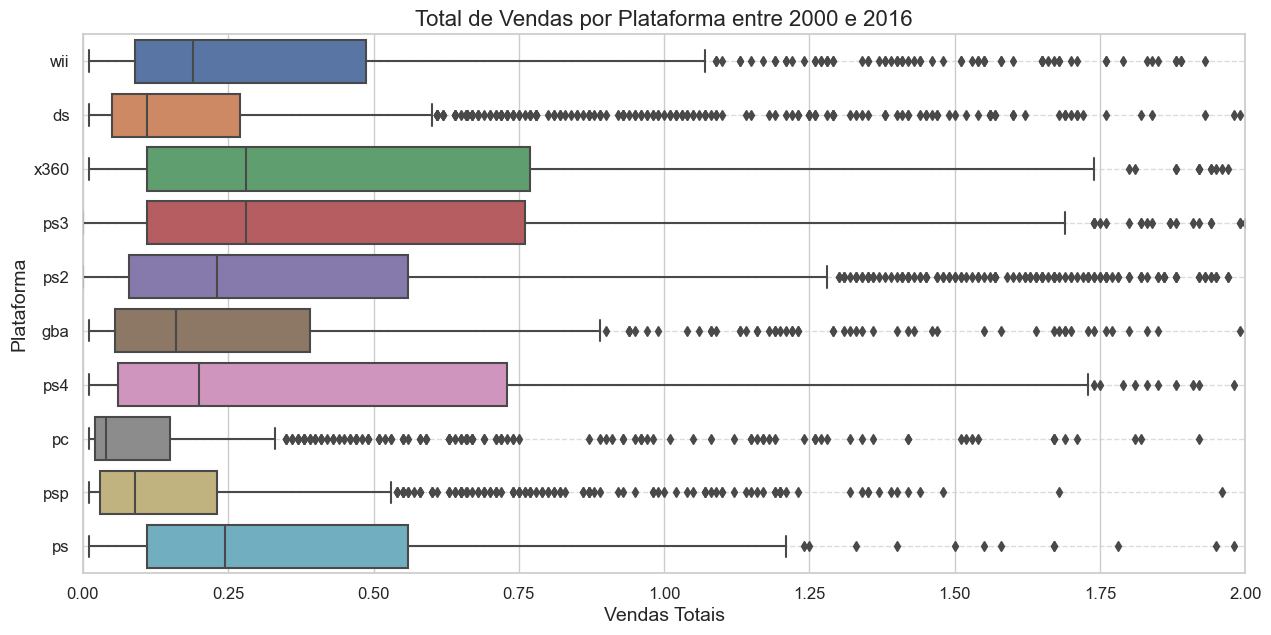

O período da análise foi entre o ano 2000 e 2016


In [32]:
# Seleção de plataformas
selected_platforms_box = ['pc', 'ps2', 'psp', 'x360', 'ps3', 'wii', 'ds', 'gba', 'ps', 'ps4']

# Filtragem dos dados para a seleção de plataformas
filtered_platform_box = df_data[df_data['platform'].isin(selected_platforms_box)]
filtered_platform_anos_validos = filtered_platform_box[filtered_platform_box['year_of_release'] > 1999]

# Cores
sns.set_theme(style="whitegrid")

# Diagrama de caixa
plt.figure(figsize=(15, 7))
sns.boxplot(x='total_sales', y='platform', data=filtered_platform_anos_validos)

# Título e eixos
plt.title('Total de Vendas por Plataforma entre 2000 e 2016', fontsize=16)
plt.xlabel('Vendas Totais', fontsize=14)
plt.ylabel('Plataforma', fontsize=14)

# Fonte dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Intervalo eixo x
plt.xlim(0, 2)

# Remoção de linhas horizontais
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Calcular o ano mínimo e máximo na coluna 'year_of_release'
ano_minimo = filtered_platform_anos_validos['year_of_release'].min()
ano_maximo = filtered_platform_anos_validos['year_of_release'].max()

# Exibir os resultados
print("O período da análise foi entre o ano", ano_minimo, "e", ano_maximo)

### Lucratividade das plataformas

In [33]:
# Cálculo das vendas médias por plataforma
mean_sales_by_platform = filtered_platform_anos_validos.groupby('platform')['total_sales'].mean().sort_values(ascending=False).reset_index()
mean_sales_by_platform = mean_sales_by_platform.rename(columns={'total_sales':'mean_sales'})

print("Vendas Médias por Plataforma (em milhões):")
print(mean_sales_by_platform)

fig = px.bar(mean_sales_by_platform, 
             x='platform',
             y='mean_sales',
             title='Vendas Médias por Plataforma',
             labels={'platform': 'Plataforma', 'mean_sales': 'Vendas Médias (em milhões)'},
             )
fig.show()


Vendas Médias por Plataforma (em milhões):
  platform  mean_sales
0      ps4    0.801378
1     x360    0.780227
2      ps3    0.713124
3      wii    0.692986
4      ps2    0.579953
5       ps    0.513504
6      gba    0.385795
7       ds    0.378660
8      psp    0.242691
9       pc    0.224340


### Correlação entre as Avaliações dos Críticos X Vendas (PS4)

In [34]:
# Seleção da plataforma
plataforma_especifica = 'ps4'

# Filtragem dos dados para a plataforma específica
dados_plataforma = df_data[df_data['platform'] == plataforma_especifica]

# Filtragem dos dados relevantes
score_sales_critic_plataforma = dados_plataforma[['critic_score', 'total_sales']]

# Gráfico de dispersão
fig = px.scatter(score_sales_critic_plataforma, x='critic_score', y='total_sales', 
                 title=f'Relação entre Pontuação dos Críticos e Vendas Totais para {plataforma_especifica}',
                 labels={'critic_score': 'Pontuação dos Críticos', 'total_sales': 'Vendas Totais (em milhões)'})

fig.show()


In [35]:
# Filtragem dos dados relevantes
score_sales_critic = df_data[['critic_score', 'total_sales']]

# Gráfico de dispersão
fig = px.scatter(score_sales_critic, x='critic_score', y='total_sales', 
                 title='Relação entre Pontuação dos Críticos e Vendas Totais',
                 labels={'critic_score': 'Pontuação dos Críticos', 'total_sales': 'Vendas Totais (em milhões)'},)

fig.show()

In [36]:
# Gráfico de dispersão críticos na plataforma específica
fig1 = px.scatter(score_sales_critic_plataforma, x='critic_score', y='total_sales', 
                  title=f'Relação entre Pontuação dos Críticos e Vendas Totais para {plataforma_especifica}',
                  labels={'critic_score': 'Pontuação dos Críticos', 'total_sales': 'Vendas Totais'})

# Filtragem dos dados relevantes para o gráfico geral
score_sales_critic_geral = df_data[['critic_score', 'total_sales']]

# Gráfico de dispersão críticos em todas as plataformas
fig2 = px.scatter(score_sales_critic_geral, x='critic_score', y='total_sales', 
                  title='Relação entre Pontuação dos Críticos e Vendas Totais (Geral)',
                  labels={'critic_score': 'Pontuação dos Críticos', 'total_sales': 'Vendas Totais'})

# Subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=(f'Para {plataforma_especifica}', 'Geral'))

# Adicionar gráficos aos subplots
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout
fig.update_layout(title_text='Comparação entre Pontuação dos Críticos e Vendas Totais (em milhões)')

fig.show()

# Calculo da correlação para a plataforma específica 'PS4'
correlacao_ps4 = score_sales_critic_plataforma['critic_score'].corr(score_sales_critic_plataforma['total_sales'])
print(f"Correlação entre pontuação dos críticos e vendas totais para a plataforma PS4: {correlacao_ps4}")

# Calculo da Correlação para todas as plataformas
correlacao_geral = score_sales_critic['critic_score'].corr(score_sales_critic['total_sales'])
print(f"Correlação entre pontuação dos críticos e vendas totais para todas as plataformas: {correlacao_geral}")

Correlação entre pontuação dos críticos e vendas totais para a plataforma PS4: 0.4065679020617816
Correlação entre pontuação dos críticos e vendas totais para todas as plataformas: 0.24534884547411373


<div style="color: #307aff;">

Observações:

Os Cálculos das correlações apontaram uma relação positiva moderada entre a pontuação dos críticos e as vendas totais tanto para a plataforma PS4 quanto para todas as plataformas em geral. Isso sugere que as avaliações do críticos tem uma leve influência com os totais de vendas mais altas.

### Correlação Avaliações dos Usuários X Vendas

In [37]:
# Seleção da plataforma
plataforma_especifica2 = 'ps4'

# Filtragem dos dados para a plataforma específica
dados_plataforma2 = df_data[df_data['platform'] == plataforma_especifica2]

# Filtragem dos dados relevantes
score_sales_user_plataforma = dados_plataforma2[['user_score', 'total_sales']]

# Gráfico de dispersão
fig = px.scatter(score_sales_user_plataforma, x='user_score', y='total_sales', 
                 title=f'Relação entre Pontuação dos Usuários e Vendas Totais para {plataforma_especifica2}',
                 labels={'user_score': 'Pontuação dos Usuários', 'total_sales': 'Vendas Totais (em milhões)'})

fig.show()

In [38]:
# Filtragem dos dados relevantes
score_sales_user = df_data[['user_score', 'total_sales']]

# Gráfico de dispersão
fig = px.scatter(score_sales_user, x='user_score', y='total_sales', 
                 title='Relação entre Pontuação dos Úsuários e Vendas Totais',
                 labels={'user_score': 'Pontuação dos Usuários', 'total_sales': 'Vendas Totais (em milhões)'})

fig.show()

In [39]:
# Gráfico de dispersão para pontuação dos usuários na plataforma específica
fig1 = px.scatter(score_sales_user_plataforma, x='user_score', y='total_sales', 
                  title=f'Relação entre Pontuação dos Usuários e Vendas Totais para {plataforma_especifica2}',
                  labels={'user_score': 'Pontuação dos Usuários', 'total_sales': 'Vendas Totais'})

# Filtragem dos dados relevantes para o gráfico geral
score_sales_user_geral = df_data[['user_score', 'total_sales']]

# Gráfico de dispersão para pontuação dos usuários em todas as plataformas
fig2 = px.scatter(score_sales_user_geral, x='user_score', y='total_sales', 
                  title='Relação entre Pontuação dos Usuários e Vendas Totais (Geral)',
                  labels={'user_score': 'Pontuação dos Usuários', 'total_sales': 'Vendas Totais'})

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=(f'Para {plataforma_especifica2}', 'Geral'))

# Adicionar gráficos aos subplots
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Atualizar layout
fig.update_layout(title_text='Comparação entre Pontuação dos Usuários e Vendas Totais (em milhões)')

# Exibir figura
fig.show()

# Cálculo da correlação para a plataforma específica 'PS4'
correlacao_ps4_user = score_sales_user_plataforma['user_score'].corr(score_sales_user_plataforma['total_sales'])
print(f"Correlação entre pontuação dos usuários e vendas totais para a plataforma PS4: {correlacao_ps4_user}")

# Cálculo da correlação para todas as plataformas
correlacao_geral_user = score_sales_user['user_score'].corr(score_sales_user['total_sales'])
print(f"Correlação entre pontuação dos usuários e vendas totais para todas as plataformas: {correlacao_geral_user}")

Correlação entre pontuação dos usuários e vendas totais para a plataforma PS4: -0.03195711020455643
Correlação entre pontuação dos usuários e vendas totais para todas as plataformas: 0.08798399271321646


<div style="color: #307aff;">

Observações:

Já o resultados da correlação entre as avaliações dos usuários e as vendas totais se mostraram extremamente fracas, praticamente nulas, o que reflete o contrário da pontuação dos críticos, as avaliações dos usuários não impactam significativamente nas vendas totais. Isso pode ser devido a vários fatores, incluindo a confiabilidade das avaliações dos usuários, o tamanho da base de usuários que contribuem com essas avaliações etc.
</div>

### Vendas de jogos em diferentes plataformas

In [40]:
# Filtragem dos dados para incluir apenas os jogos com múltiplas plataformas
multi_platform_games = df_data.groupby('name').filter(lambda x: len(x) > 1)

# Gráfico de barras
fig = px.histogram(multi_platform_games.head(50), x='name', y='total_sales', color='platform',
             title='Comparação de Vendas de Jogos em Diferentes Plataformas',
             labels={'name': 'Título do Jogo', 'total_sales': 'Vendas Globais', 'platform': 'Plataformas'})

# Layout do gráfico
fig.update_layout(xaxis_title='Títulos dos Jogos', yaxis_title='Vendas Globais', height=800)

fig.show()

<div style="color: #307aff;">

Observações:

* Diferenças nas vendas entre plataformas: O gráfico mostra as vendas globais de jogos para diferentes plataformas. Podemos observar que as vendas podem variar significativamente entre as plataformas para o mesmo título de jogo. Por exemplo, o jogo "Grand Theft Auto V" (4ª barra) tem vendas consideráveis nas plataformas PS3, PS4 e X360, mas as vendas na plataforma X360 são consideravelmente maiores do que nas outras duas.

* Variação de popularidade entre as plataformas: Alguns jogos podem ser mais populares em determinadas plataformas do que em outras. Por exemplo, "Call of Duty: Black Ops II" (5ª barra) tem vendas significativas no PS3 e X360, mas as vendas no PS3 são consideravelmente maiores do que no X360.

* Impacto das plataformas na receita total: As vendas de jogos em diferentes plataformas contribuem para a receita total de uma empresa de desenvolvimento de jogos. Portanto, compreender as preferências dos consumidores em relação às plataformas e otimizar os lançamentos de jogos para atender a essas preferências é importante para maximizar o sucesso financeiro.
</div>



In [41]:
# Quantidade de jogos por gênero
genre_counts = df_data['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Gráfico de barras
fig = px.bar(genre_counts, x='genre', y='count', 
             title='Distribuição Geral de Jogos por Gênero',
             labels={'genre': 'Gênero', 'count': 'Quantidade de Jogos'})

# Layout do gráfico
fig.update_layout(xaxis_title='Gênero', yaxis_title='Quantidade de Jogos')

fig.show()

<div style="color: #307aff;">

Observações:
    
* Popularidade dos gêneros de ação e esportes: Os gêneros de ação e esportes tem a maior quantidade de jogos, são 3.307 de ação e 2.306 de esportes. Isso pode sugere que jogos de ação e esportes são mais populares tanto entre os desenvolvedores quanto entre os jogadores.

* Diversidade de gêneros: Há uma variedade de gêneros representados na indústria de jogos, incluindo, RPG, tiro, aventura, corrida, plataforma, simulação, luta, estratégia e quebra-cabeça. Isso reflete a diversidade de interesses e preferências dos jogadores. Talvez seja interessante fazer uma análise popularidade por região para fins de direcionamento de recursos e campanhas de marketing.

* Potencial de mercado para diferentes gêneros: A quantidade de jogos em cada gênero pode indicar o potencial de mercado e a demanda dos jogadores por determinados tipos de jogos. Por exemplo, o grande número de jogos de ação e esportes pode indicar uma demanda consistente por esses tipos de jogos, enquanto gêneros menos representados podem representar oportunidades de nicho para os desenvolvedores explorarem.
</div>




<a id='interacao-criativa-com-os-dados'></a>
## 5 - Interação Criativa com os Dados:

### 5.1 - Top 5 Plataformas por Região


In [42]:
# Cálculo das cinco plataformas principais em cada região
top_platforms_na = df_data.groupby('platform')['na_sales'].sum().nlargest(5).reset_index()
top_platforms_eu = df_data.groupby('platform')['eu_sales'].sum().nlargest(5).reset_index()
top_platforms_jp = df_data.groupby('platform')['jp_sales'].sum().nlargest(5).reset_index()

print("Cinco principais plataformas na América do Norte (NA):\n", top_platforms_na)
print("\nCinco principais plataformas na Europa (EU):\n", top_platforms_eu)
print("\nCinco principais plataformas no Japão (JP):\n", top_platforms_jp)

Cinco principais plataformas na América do Norte (NA):
   platform  na_sales
0     x360    595.74
1      ps2    572.92
2      wii    486.87
3      ps3    390.13
4       ds    380.31

Cinco principais plataformas na Europa (EU):
   platform  eu_sales
0      ps2    332.63
1      ps3    327.21
2     x360    268.32
3      wii    258.32
4       ps    212.39

Cinco principais plataformas no Japão (JP):
   platform  jp_sales
0       ds    175.02
1       ps    139.78
2      ps2    137.54
3     snes    116.55
4      3ds    100.62


In [43]:

# Concatenação dos dados das três regiões em um único DataFrame
df_total_sales = pd.concat([top_platforms_na, top_platforms_eu, top_platforms_jp], keys=['NA', 'EU', 'JP'])

# Gráfico 
fig = px.bar(df_total_sales, 
             x='platform', 
             y=['na_sales', 'eu_sales', 'jp_sales'], 
             color=df_total_sales.index.get_level_values(0),
             barmode='group',
             labels={'platform': 'Plataformas', 'value': 'Vendas Totais (em milhões)', 'color': 'Região'},
             title='Variações das quotas de mercado por região'
            )

fig.show()


<div style="color: #307aff;">

Observações:

As plataformas X360, PS2, Wii, PS3 e DS são muito populares na America do Norte e Europa e nota-se um equilíbrio de preferência levemente maior entre elas na Europa, enquanto que no Japão as quatro mais populares são DS, PS, PS2, SNES e 3DS.

O fato de o Nintendo DS ser mais vendido no Japão pode indicar uma forte preferência pelos portáteis.

As diferentes preferencias entre os jogadores em diferentes partes do mundo podem indicar o potencial de mercado em cada região.
 
</div>

### 5.2 - Top 5 Gêneros por Região


In [44]:
# Cálculo das cinco principais gêneros em cada região
top_genres_na = df_data.groupby('genre')['na_sales'].sum().nlargest(5).reset_index()
top_genres_eu = df_data.groupby('genre')['eu_sales'].sum().nlargest(5).reset_index()
top_genres_jp = df_data.groupby('genre')['jp_sales'].sum().nlargest(5).reset_index()

print("Cinco principais gêneros na América do Norte (NA):\n", top_genres_na)
print("\nCinco principais gêneros na Europa (EU):\n", top_genres_eu)
print("\nCinco principais gêneros no Japão (JP):\n", top_genres_jp)


Cinco principais gêneros na América do Norte (NA):
       genre  na_sales
0    action    863.17
1    sports    671.20
2   shooter    584.83
3  platform    444.44
4      misc    399.57

Cinco principais gêneros na Europa (EU):
      genre  eu_sales
0   action    510.99
1   sports    371.33
2  shooter    314.52
3   racing    234.49
4     misc    210.60

Cinco principais gêneros no Japão (JP):
           genre  jp_sales
0  role-playing    353.39
1        action    160.14
2        sports    134.93
3      platform    130.71
4          misc    107.02


In [45]:

# Concatenação dos dados das três regiões em um único DataFrame
df_top_genres = pd.concat([top_genres_na, top_genres_eu, top_genres_jp], keys=['NA', 'EU', 'JP'])

# Gráfico
fig = px.bar(df_top_genres, 
             x='genre',
             y=['na_sales', 'eu_sales', 'jp_sales'], 
             color=df_top_genres.index.get_level_values(0),
             barmode='group',
             labels={'genre': 'Gêneros', 'value': 'Vendas Totais (em milhões)', 'color': 'Região'},
             title='Top Gêneros por região'
            )

fig.show()


<div style="color: #307aff;">

Observações:

Os gêneros mais populares na América do Norte e Europa, em geral são bastante semelhantes na preferência mas consideravelmente diferentes no volume. 

No Japão o Gênero RPG é muito mais forte em relação aos demais que tem volume mais equilibrado entre si, indicando preferência e potencial de mercado em relação ao gênero.


</div>

### 5.3 - Relação ESRB x Vendas

In [46]:
# Cálculo das vendas totais por classificação do ESRB em cada região
sales_by_rating_na = df_data.groupby('rating')['na_sales'].sum().reset_index()
sales_by_rating_eu = df_data.groupby('rating')['eu_sales'].sum().reset_index()
sales_by_rating_jp = df_data.groupby('rating')['jp_sales'].sum().reset_index()

print("Vendas totais por classificação do ESRB na América do Norte (NA):\n", sales_by_rating_na)
print("\nVendas totais por classificação do ESRB na Europa (EU):\n", sales_by_rating_eu)
print("\nVendas totais por classificação do ESRB no Japão (JP):\n", sales_by_rating_jp)


Vendas totais por classificação do ESRB na América do Norte (NA):
   rating  na_sales
0     AO      1.26
1      E   1274.24
2   E10+    345.50
3     EC      1.53
4    K-A      2.56
5      M    742.89
6     RP      0.00
7      T    747.60

Vendas totais por classificação do ESRB na Europa (EU):
   rating  eu_sales
0     AO      0.61
1      E    703.87
2   E10+    183.35
3     EC      0.11
4    K-A      0.27
5      M    480.00
6     RP      0.03
7      T    421.79

Vendas totais por classificação do ESRB no Japão (JP):
   rating  jp_sales
0     AO      0.00
1      E    197.96
2   E10+     40.20
3     EC      0.00
4    K-A      1.46
5      M     63.58
6     RP      0.00
7      T    150.70


In [47]:

# Concatenação dos dados das três regiões em um único DataFrame
df_esrb_sales = pd.concat([sales_by_rating_na, sales_by_rating_eu, sales_by_rating_jp], keys=['NA', 'EU', 'JP'])

# Gráfico
fig = px.bar(df_esrb_sales, 
             x='rating',
             y=['na_sales', 'eu_sales', 'jp_sales'], 
             color=df_esrb_sales.index.get_level_values(0),
             barmode='group',
             labels={'rating': 'Classificação ESRB', 'value': 'Vendas Totais', 'color': 'Regiões'},
             title='Classificação Etária ESRB por região'
            )

fig.show()


<div style="color: #307aff;">

Observações:

Os resultados demonstram que as classificações do ESRB impactam de diferentes maneiras as vendas em cada região. Exceto as classificações "E" e "E10+" (Everyone e Everyone 10 and older) que estão na mesma ordem nas três regiões, podemos ver uma diferença nas classificações "T" (Teen) e "M" (Mature). Na América do Norte e Europa estão bem equilibradas, enquanto no Japão, a classificação "T" (Teen) é quase 3x maior que a "M" (Mature). Isso pode ter relação com a cultura de cada região e também com o público-Alvo.

</div>

<a id='testes-estatisticos-de-hipotese'></a>
## 6 - Testes Estatísticos de Hipótese

### 6.1 - Hipóteses: 
### H0 Hipótese Nula: As classificações médias dos usuários das plataformas Xbox One e PC são IGUAIS.
### H1 Hipótese Alternativa: As classificações médias dos usuários das plataformas Xbox One e PC são DIFERENTES.


In [48]:
# Filtragem de dados para as plataformas Xbox One e PC
user_scores_xbox_one = df_data[df_data['platform'] == 'xone']['user_score']
user_scores_pc = df_data[df_data['platform'] == 'pc']['user_score']

# Cáuculo das médias das classificações dos usuários para Xbox One e PC
mean_user_score_xbox_one = user_scores_xbox_one.mean()
mean_user_score_pc = user_scores_pc.mean()

print("Classificação média dos usuários da plataforma Xbox One:", mean_user_score_xbox_one)
print("Classificação média dos usuários da plataforma PC:", mean_user_score_pc)


Classificação média dos usuários da plataforma Xbox One: 6.521428571428572
Classificação média dos usuários da plataforma PC: 7.065960264900661


In [49]:
# DataFrame
data = {'Plataforma': ['Xbox One', 'PC'],
        'Média da Pontuação dos Usuários': [mean_user_score_xbox_one, mean_user_score_pc]}

df_mean_scores = pd.DataFrame(data)

# Gráfico de barras
fig = px.bar(df_mean_scores, x='Plataforma', y='Média da Pontuação dos Usuários', 
             color='Plataforma', title='Média das Classificações dos Usuários por Plataforma')

fig.show()


In [50]:
# Cáuculo do desvio padrão e variância das classificações dos usuários para Xbox One e PC
std_dev_user_score_xbox_one = np.std(user_scores_xbox_one)
variance_user_score_xbox_one = np.var(user_scores_xbox_one)

std_dev_user_score_pc = np.std(user_scores_pc)
variance_user_score_pc = np.var(user_scores_pc)

print("Desvio padrão das classificações dos usuários da plataforma Xbox One:", std_dev_user_score_xbox_one)
print("Variância das classificações dos usuários da plataforma Xbox One:", variance_user_score_xbox_one)
print()
print("Desvio padrão das classificações dos usuários da plataforma PC:", std_dev_user_score_pc)
print("Variância das classificações dos usuários da plataforma PC:", variance_user_score_pc)
print()

# Filtro dos dados para as plataformas Xbox One e PC
user_scores_xbox_one = df_data[df_data['platform'] == 'xone']['user_score'].dropna()
user_scores_pc = df_data[df_data['platform'] == 'pc']['user_score'].dropna()

# Teste t de Student para duas amostras independentes
t_statistic, p_value = ttest_ind(user_scores_xbox_one, user_scores_pc)

# Resultado do teste
print("Teste t:", t_statistic)
print("Valor p:", p_value)
print()
print('Resultado do Teste de Hipótese:')

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que as classificações médias dos usuários das plataformas Xbox One e PC são diferentes.")


Desvio padrão das classificações dos usuários da plataforma Xbox One: 1.3771415462124992
Variância das classificações dos usuários da plataforma Xbox One: 1.8965188383045533

Desvio padrão das classificações dos usuários da plataforma PC: 1.5317025884985562
Variância das classificações dos usuários da plataforma PC: 2.3461128196131775

Teste t: -4.38289526334195
Valor p: 1.3037979620149106e-05

Resultado do Teste de Hipótese:
Rejeitamos a hipótese nula. As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.


### 6.2 - Hipóteses:
### H0 Hipótese Nula: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são IGUAIS.
### H1 Hipótese Alternativa: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são DIFERENTES.

In [51]:
# Filtragem de dados para os gêneros Action e Sports
user_scores_action = df_data[df_data['genre'] == 'action']['user_score']
user_scores_sports = df_data[df_data['genre'] == 'sports']['user_score']

# Cáuculo das médias das classificações dos usuários para os gêneros Action e Sports
mean_user_scores_action = user_scores_action.mean()
mean_user_scores_sports = user_scores_sports.mean()

print("Classificação média dos usuários do gênero Action:", mean_user_scores_action)
print("Classificação média dos usuários do gênero Sports:", mean_user_scores_sports)


Classificação média dos usuários do gênero Action: 7.058129175946546
Classificação média dos usuários do gênero Sports: 6.951433857539316


In [52]:
# DataFrame
data_genres = {'Gênero': ['Action', 'Sports'],
               'Média da Pontuação dos Usuários': [mean_user_scores_action, mean_user_scores_sports]}

df_mean_scores_genres = pd.DataFrame(data_genres)

# Gráfico de barras
fig = px.bar(df_mean_scores_genres, x='Gênero', y='Média da Pontuação dos Usuários', 
             color='Gênero', title='Média das Classificações dos Usuários por Gênero')

fig.show()


In [53]:
# Cálculo do desvio padrão e variância das classificações dos usuários para os gêneros Action e Sports
std_dev_user_score_action = np.std(user_scores_action)
variance_user_score_action = np.var(user_scores_action)

std_dev_user_score_sports = np.std(user_scores_sports)
variance_user_score_sports = np.var(user_scores_sports)

print("Desvio padrão das classificações dos usuários do gênero Action:", std_dev_user_score_action)
print("Variância das classificações dos usuários do gênero Action:", variance_user_score_action)
print()
print("Desvio padrão das classificações dos usuários do gênero Sports:", std_dev_user_score_sports)
print("Variância das classificações dos usuários do gênero Sports:", variance_user_score_sports)
print()

# Filtro dos dados para os gêneros Action e Sports
user_scores_action = df_data[df_data['genre'] == 'action']['user_score'].dropna()
user_scores_sports = df_data[df_data['genre'] == 'sports']['user_score'].dropna()

# Teste t de Student para duas amostras independentes
t_statistic, p_value = ttest_ind(user_scores_action, user_scores_sports)

# Resultado do teste
print("Teste t:", t_statistic)
print("Valor p:", p_value)
print()
print('Resultado do Teste de Hipótese:')

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.")


Desvio padrão das classificações dos usuários do gênero Action: 1.4235044341982805
Variância das classificações dos usuários do gênero Action: 2.0263648741821667

Desvio padrão das classificações dos usuários do gênero Sports: 1.6188357865776686
Variância das classificações dos usuários do gênero Sports: 2.620629303904539

Teste t: 1.8472797735322193
Valor p: 0.06480928064420527

Resultado do Teste de Hipótese:
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.


<a id='conclusao'></a>
## 7 - CONCLUSÃO

Na etapa de preparação dos dados convertemos os colunas e os dados das coluna para minúsculas, assim como os dados dos anos de lançamento para números inteiros e os da coluna de avaliações de usuários para float64, tornando o conjunto de dados mais consistente.
Os valores nulos das colunas ‘User_score’ e ‘Critic_Score’ foram tratados pontualmente de acordo com a necessidade.

A preparação e tratamento dos dados desta maneira permite uma análise mais assertiva.

A análise destes dados trata das mudanças nas vendas de jogos e plataformas de video game desde os anos 1980 mostrando seu surgimento, ascendência, picos e declínios, volumes de vendas, categorias e classificações dadas pro críticos da área e usuários comuns.

É possível ver os ciclos de vida de cada plataforma, os concorrentes de cada período, além de poder comparar o final de ciclos de vida de algumas plataformas ao mesmo tempo do início do ciclo de outras, plataformas que foram substituídas pelas suas novas versões, etc.

É possível ver um aumento significativo nos lançamentos de jogos a partir da década dos anos 1990 e constatar que o ciclo de vida médio das plataformas gira entre 9 e 10 anos, com um destaque para os lançamentos para ‘PC’ que se manteve constante por aproximadamente 20 anos.


No que diz respeito à relação das avaliações dos críticos e usuários e as vendas dos jogos não é possível afirmar que há uma relação direta demonstrando que outros fatores podem ser mais significativos nesta questão.

As classificações etária com mais vendas nas três regiões estudadas são “E” (Everyone), “T” (Teen), “M” (Mature) e “E10+” (Everyone 10+) com uma leve diferença entre a “T” e a “M” a depender da região.

Esta análise pode ajudar a entender o quão dinâmico é este setor e o quanto o avanço da tecnologia pode encurtar os ciclos de vida de cada jogo e/ou plataformas, auxiliando no planejamento da criação de novas plataformas, assim como as campanhas publicitárias podem atuar.

O estudo de perfis de usuários por região podem ajudar a entender as demandas locais podendo indicar tendências que podem estar atreladas à cultura e costumes de cada lugar. Os fabricantes de cada plataforma podem se beneficiar muito de análises como esta direcionando recursos de marketing específicos para cada necessidade regional.


Em relação aos *testes estatísticos, analisamos 2 hipóteses. Os resultados são os seguintes: 

1ª Hipótese: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

A Classificação média dos usuários da plataforma Xbox One e PC são 6.52 e 7.06 respectivamente e o teste t de Student REJEITOU a hipótese nula em favor da hipótese alternativa considerando estatisticamente que as classificações médias dos usuários das plataformas Xbox One e PC são DIFERENTES.

2ª Hipótese: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

A Classificação média dos usuários do gênero Action e Sports são 7.05 e 6,96 respectivamente e o teste t de Student NÃO REJEITOU a hipótese nula em favor da hipótese alternativa considerando estatisticamente que não há evidências suficientes para afirmar que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais.